In [5]:
# import required libraries
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime 
import requests
import csv
import pprint
import requests

import pandas as pd                        
from pytrends.request import TrendReq
import tweepy
import json
import re
import os
import OpenBlender
from io import StringIO

import sweetviz 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

import plotly.express as px

In [6]:
file_path="C:/Users/mayur g/GREAT_LEARNING_CAPSTONE/archive/"
bitcoin_df=pd.read_csv(file_path+"coin_Bitcoin.csv")
ethereum_df=pd.read_csv(file_path+"coin_Ethereum.csv")
binance_df=pd.read_csv(file_path+"coin_Binancecoin.csv")
dogecoin_df=pd.read_csv(file_path+"coin_Dogecoin.csv")
cardano_df=pd.read_csv(file_path+"coin_Cardano.csv")
polkadot_df=pd.read_csv(file_path+"coin_Polkadot.csv")
solana_df=pd.read_csv(file_path+"coin_Solana.csv")
tether_df=pd.read_csv(file_path+"coin_Tether.csv")
xrp_df=pd.read_csv(file_path+"coin_XRP.csv")
usd_df=pd.read_csv(file_path+"coin_USDcoin.csv")

In [123]:
list_df=[bitcoin_df,ethereum_df,binance_df,dogecoin_df,cardano_df,polkadot_df,solana_df,tether_df,xrp_df,usd_df]

crypto_names=["Bitcoin","Ethereum","Binance","Dogecoin","Cardano","Polkadot","Solana","Tether","XRP","USDCoin"]

In [124]:
for data,label in zip(list_df,crypto_names):
    print("-----------------------------------------------")
    print(f"Crpto currency :-{label}")
    print("dataset head info -")
    print(data.tail(4))

-----------------------------------------------
Crpto currency :-Bitcoin
dataset head info -
        Name Symbol        Date         High          Low         Open  \
183  Bitcoin    BTC  03-07-2021  34909.25990  33402.69654  33854.42136   
184  Bitcoin    BTC  04-07-2021  35937.56715  34396.47746  34665.56487   
185  Bitcoin    BTC  05-07-2021  35284.34443  33213.66103  35284.34443   
186  Bitcoin    BTC  06-07-2021  35038.53636  33599.91617  33723.50966   

           Close        Volume     Marketcap  
183  34668.54840  2.438396e+10  6.500000e+11  
184  35287.77977  2.492431e+10  6.620000e+11  
185  33746.00246  2.672155e+10  6.330000e+11  
186  34235.19345  2.650126e+10  6.420000e+11  
-----------------------------------------------
Crpto currency :-Ethereum
dataset head info -
         Name Symbol        Date         High          Low         Open  \
183  Ethereum    ETH  03-07-2021  2237.567155  2117.590013  2150.835025   
184  Ethereum    ETH  04-07-2021  2384.286857  2190.83770

In [125]:
for data,label in zip(list_df,crypto_names):
    print("-----------------------------------------------")
    print(f"Crpto currency :-{label}")
    print("datatypes info -")
    print(data.dtypes)
                    
#data types looks good of all other variables except for Date data which is Object so we can change its type to datetime in all datasets


-----------------------------------------------
Crpto currency :-Bitcoin
datatypes info -
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object
-----------------------------------------------
Crpto currency :-Ethereum
datatypes info -
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Marketcap    float64
dtype: object
-----------------------------------------------
Crpto currency :-Binance
datatypes info -
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object
-----------------------------------------------
Crpto currency :-Dogecoin
datatypes info -
Name          object
Symbol  

In [126]:
#changing of datatype of date in all datasets from object to string

for data in list_df:
    print("-----------------------------------------------")
    print(f"Crpto currency :-{label}")
    data["Date"] = pd.to_datetime(data["Date"],format="%d-%m-%Y")
#     data["Volume"] = data["Volume"].astype("int64")
#     data["Marketcap"] = data["Marketcap"].astype("int64")
    print("datatypes info -")
    print(data.dtypes)
    
    
#finally we have changed datatype of date from object to datetime in all of our datasets

-----------------------------------------------
Crpto currency :-USDCoin
datatypes info -
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object
-----------------------------------------------
Crpto currency :-USDCoin
datatypes info -
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume                int64
Marketcap           float64
dtype: object
-----------------------------------------------
Crpto currency :-USDCoin
datatypes info -
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Vo

In [127]:
#info about all datatypes 

for data in list_df:
    print("-----------------------------------------------")
    print(f"Crpto currency :-{label}")
    print("dataset info -")
    print(data.info())
    
#by observing info about datasets of cryptocurrencies we found that there are 187 rows and and 9 columns in each of dataset
#there is no null value present in each of the dataset
#also datatypes seems to be fine 

-----------------------------------------------
Crpto currency :-USDCoin
dataset info -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       187 non-null    object        
 1   Symbol     187 non-null    object        
 2   Date       187 non-null    datetime64[ns]
 3   High       187 non-null    float64       
 4   Low        187 non-null    float64       
 5   Open       187 non-null    float64       
 6   Close      187 non-null    float64       
 7   Volume     187 non-null    float64       
 8   Marketcap  187 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 11.8+ KB
None
-----------------------------------------------
Crpto currency :-USDCoin
dataset info -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 9 columns):
 #   Column     Non-Nu

In [128]:
#checking null values in each columns of datasets

for data in list_df:
    print("-----------------------------------------------")
    print(f"Crpto currency :-{label}")
    print("null values info  -")
    print(data.isnull().sum())
    
# we found 0 null values here 

-----------------------------------------------
Crpto currency :-USDCoin
null values info  -
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
-----------------------------------------------
Crpto currency :-USDCoin
null values info  -
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
-----------------------------------------------
Crpto currency :-USDCoin
null values info  -
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
-----------------------------------------------
Crpto currency :-USDCoin
null values info  -
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
------------------------------------

In [129]:
#desciption or general statistics summary  about all datatasets

for data in list_df:
    print("-----------------------------------------------")
    print(f"Crpto currency :-{label}")
    print("general statistics summary  -")
    print(data.describe())
    
    
    
#inferences ------>>>


-----------------------------------------------
Crpto currency :-USDCoin
general statistics summary  -
               High           Low          Open         Close        Volume  \
count    187.000000    187.000000    187.000000    187.000000  1.870000e+02   
mean   47025.740478  43692.138739  45514.300099  45539.275876  6.037712e+10   
std    10085.512507  10113.030005  10098.267357  10061.708112  2.792341e+10   
min    29600.626950  28722.755270  28994.008920  29374.151890  2.438396e+10   
25%    37474.218440  34164.047720  35813.751090  35789.261350  4.696088e+10   
50%    48047.744590  44187.762350  46344.772240  46339.760080  5.729558e+10   
75%    57383.805560  53625.249035  55917.617340  55928.973000  6.849937e+10   
max    64863.098910  62208.964370  63523.754870  63503.457930  3.510000e+11   

          Marketcap  
count  1.870000e+02  
mean   8.502032e+11  
std    1.877833e+11  
min    5.460000e+11  
25%    6.700000e+11  
50%    8.640000e+11  
75%    1.040000e+12  
max    1.

max    8.350871e+10  
-----------------------------------------------
Crpto currency :-USDCoin
general statistics summary  -
             High         Low        Open       Close        Volume  \
count  187.000000  187.000000  187.000000  187.000000  1.870000e+02   
mean     1.001325    0.999602    1.000289    1.000308  2.154041e+09   
std      0.002388    0.000539    0.000980    0.000970  8.860350e+08   
min      1.000082    0.997097    0.997910    0.997912  9.440501e+08   
25%      1.000322    0.999455    0.999937    0.999981  1.642439e+09   
50%      1.000799    0.999764    1.000084    1.000089  1.916803e+09   
75%      1.001533    0.999832    1.000381    1.000360  2.311940e+09   
max      1.026529    1.001303    1.010572    1.010496  8.053431e+09   

          Marketcap  
count  1.870000e+02  
mean   1.266372e+10  
std    6.870550e+09  
min    4.029300e+09  
25%    7.285682e+09  
50%    1.076892e+10  
75%    1.438456e+10  
max    2.579198e+10  


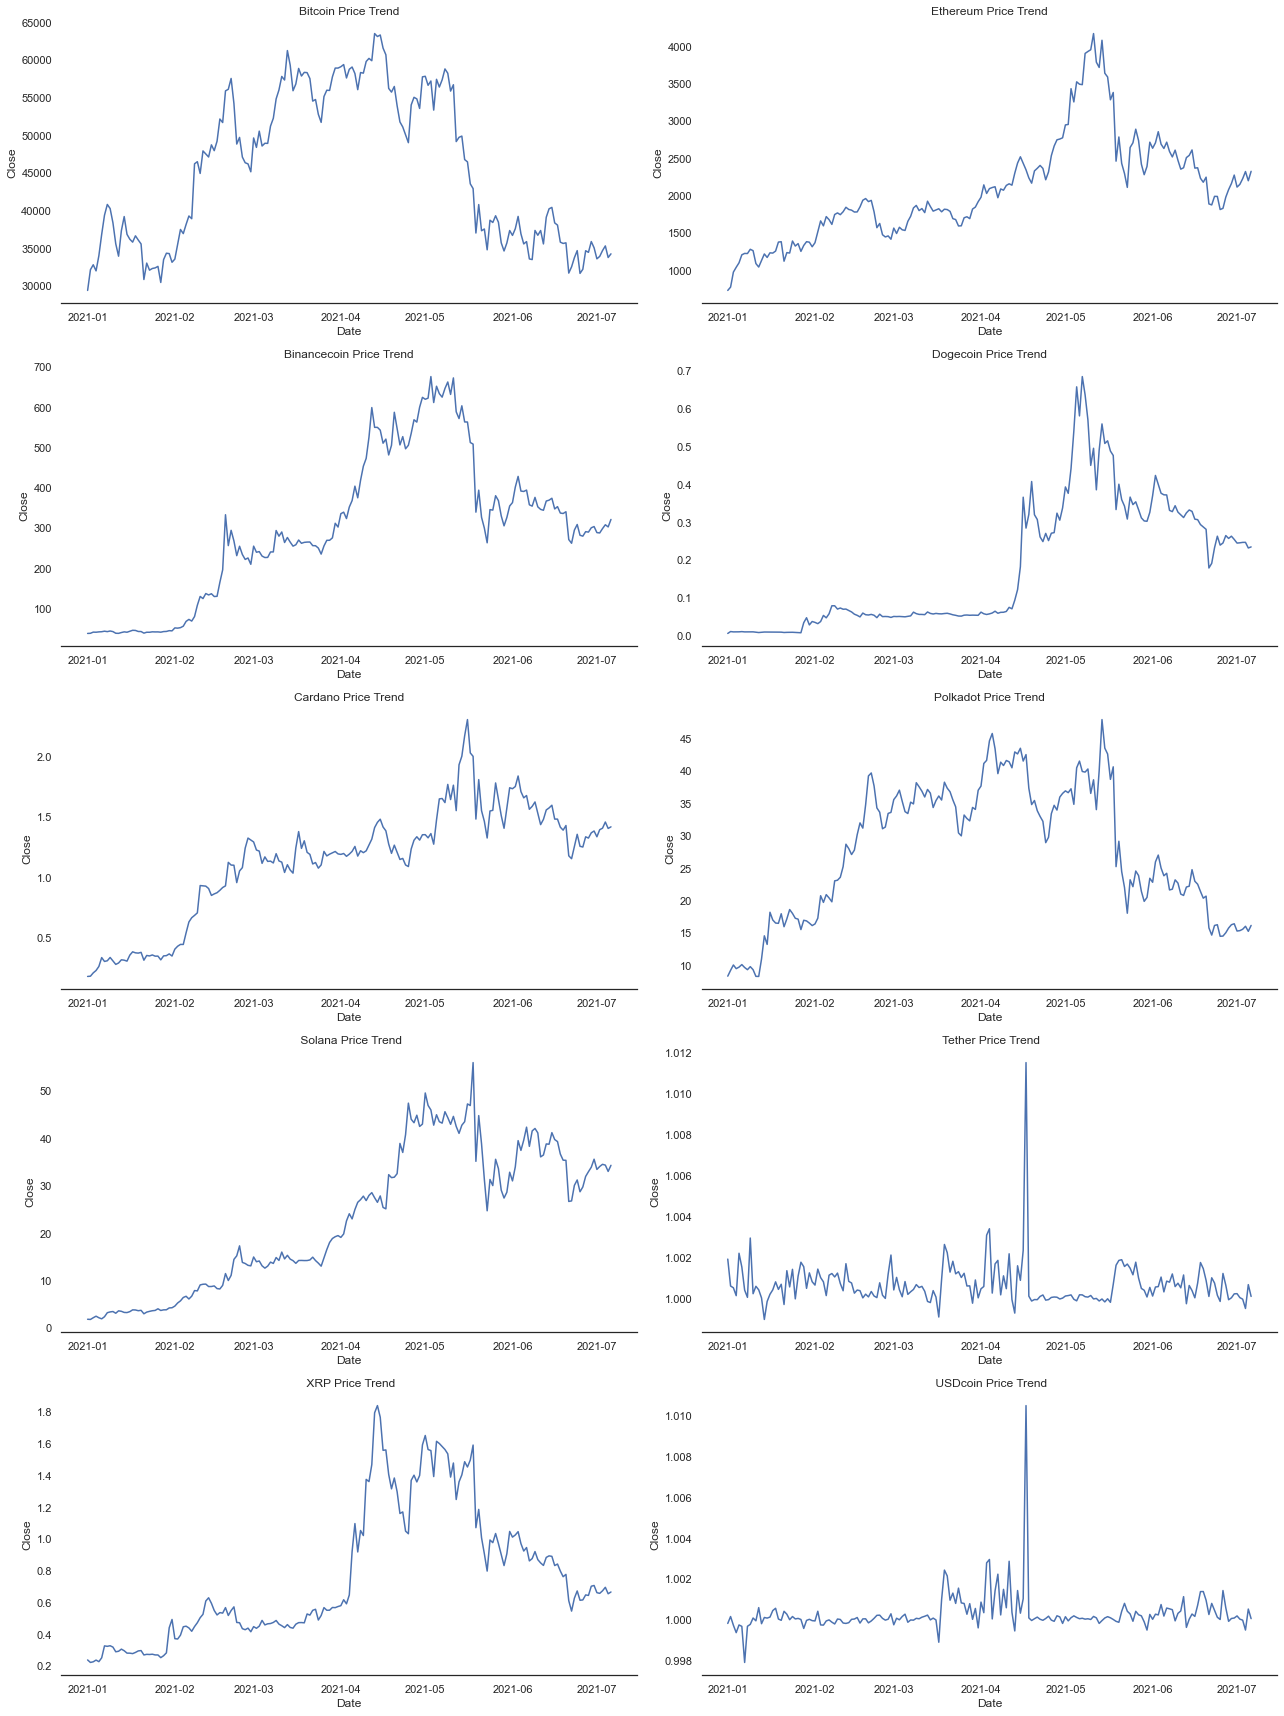

In [130]:
# #close price trends ---for all 10 coins :

#Now plot the closing price (adjusted) of the stock over the period of past 6 months
#to get a general idea of how the cryptocurrencies performed in the given period.

sns.set(style="white")

f, axes = plt.subplots(5,2, figsize=(18,24))
sns.despine(left=True)


sns.lineplot(x="Date",y="Close",data=bitcoin_df,ax=axes[0,0])
axes[0, 0].set_title("Bitcoin Price Trend")

sns.lineplot(x="Date",y="Close",data=ethereum_df,ax=axes[0,1])
axes[0, 1].set_title("Ethereum Price Trend")

sns.lineplot(x="Date",y="Close",data=binance_df,ax=axes[1,0])
axes[1, 0].set_title("Binancecoin Price Trend")

sns.lineplot(x="Date",y="Close",data=dogecoin_df,ax=axes[1,1])
axes[1, 1].set_title("Dogecoin Price Trend")

sns.lineplot(x="Date",y="Close",data=cardano_df,ax=axes[2,0])
axes[2, 0].set_title("Cardano Price Trend")

sns.lineplot(x="Date",y="Close",data=polkadot_df,ax=axes[2,1])
axes[2, 1].set_title("Polkadot Price Trend")

sns.lineplot(x="Date",y="Close",data=solana_df,ax=axes[3,0])
axes[3, 0].set_title(" Solana Price Trend")


sns.lineplot(x="Date",y="Close",data=tether_df,ax=axes[3,1])
axes[3, 1].set_title(" Tether Price Trend")

sns.lineplot(x="Date",y="Close",data=xrp_df,ax=axes[4,0])
axes[4, 0].set_title(" XRP Price Trend")

sns.lineplot(x="Date",y="Close",data=usd_df,ax=axes[4,1])
axes[4, 1].set_title(" USDcoin Price Trend")



plt.tight_layout()


#inferences drawn ----->>>



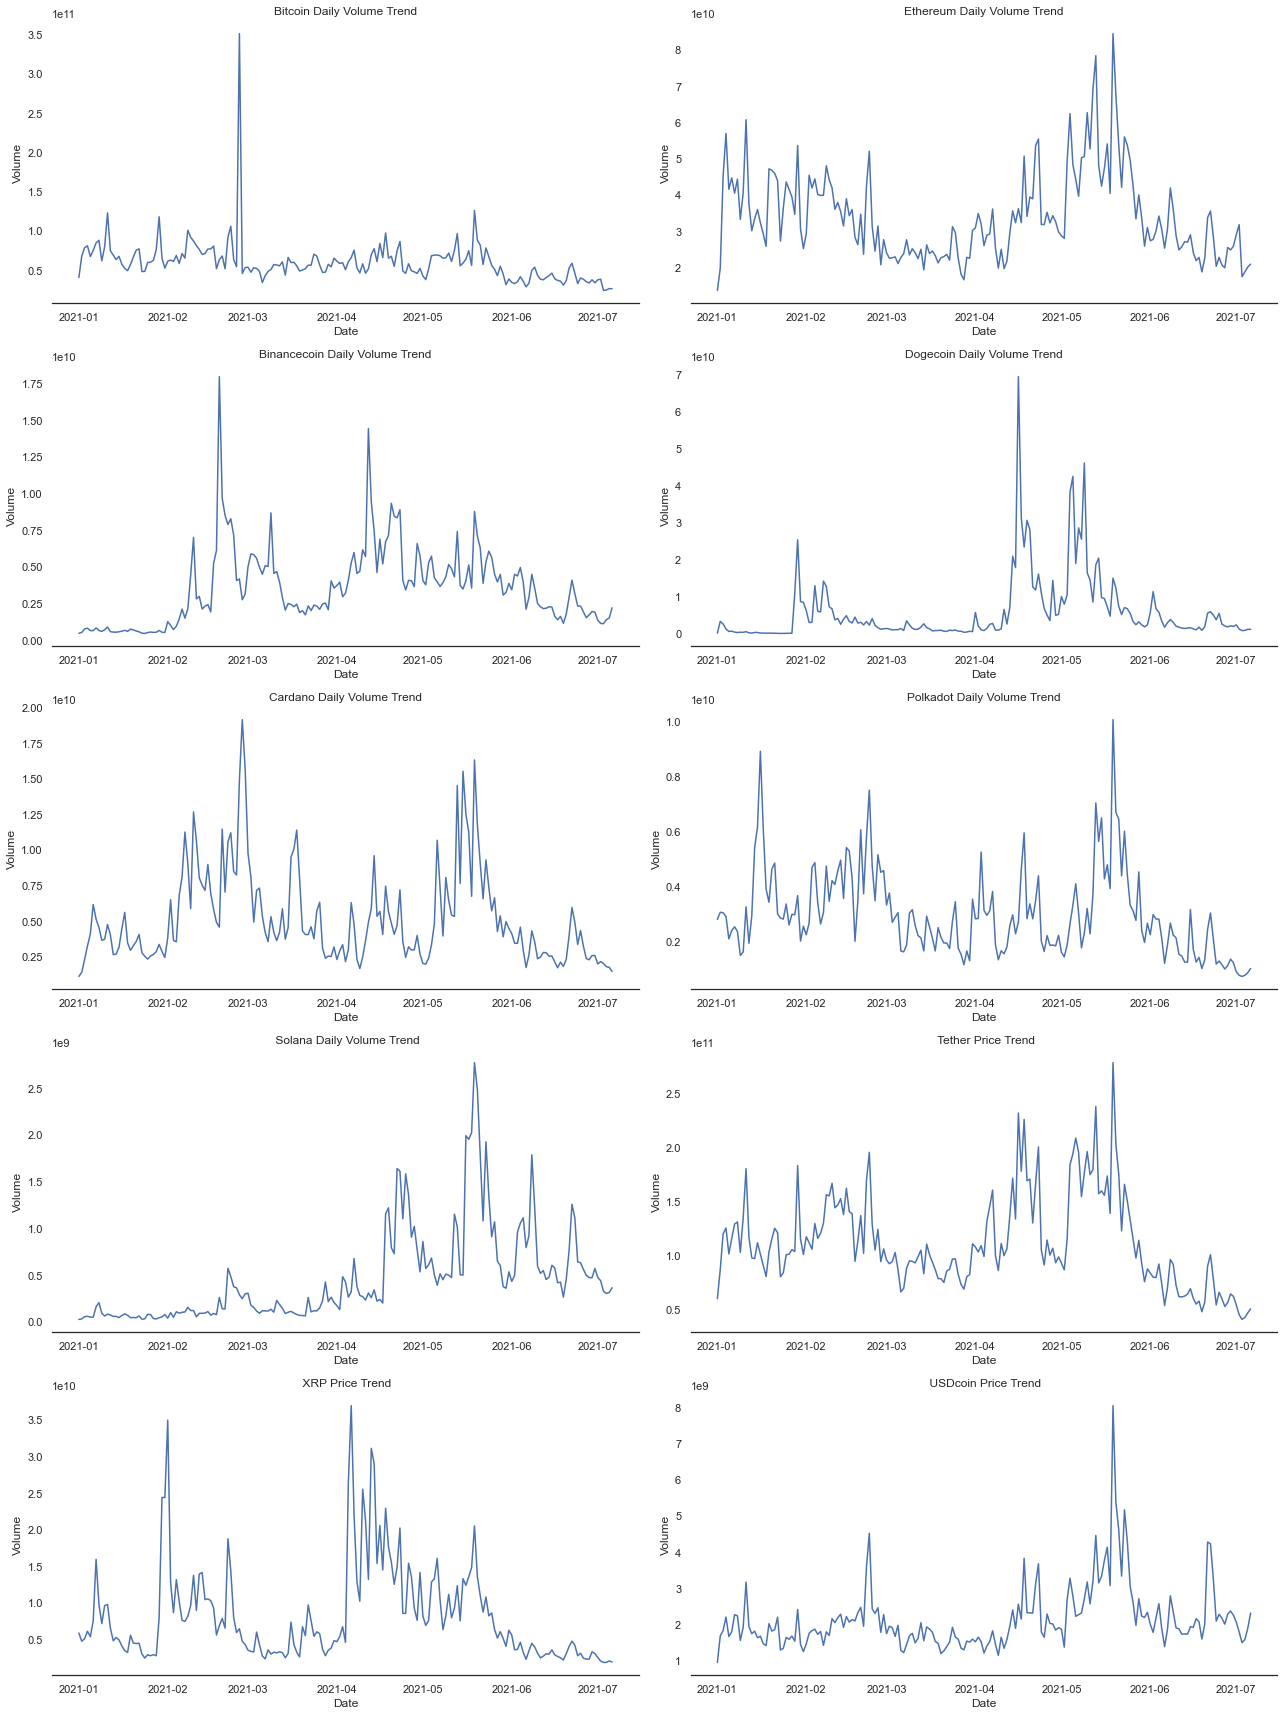

In [131]:

#volume vs date of each crypto -->>



sns.set(style="white")

f, axes = plt.subplots(5,2, figsize=(18,24))
sns.despine(left=True)


sns.lineplot(x="Date",y="Volume",data=bitcoin_df,ax=axes[0,0])
axes[0, 0].set_title("Bitcoin Daily Volume Trend")

sns.lineplot(x="Date",y="Volume",data=ethereum_df,ax=axes[0,1])
axes[0, 1].set_title("Ethereum Daily Volume Trend")

sns.lineplot(x="Date",y="Volume",data=binance_df,ax=axes[1,0])
axes[1, 0].set_title("Binancecoin Daily Volume Trend")

sns.lineplot(x="Date",y="Volume",data=dogecoin_df,ax=axes[1,1])
axes[1, 1].set_title("Dogecoin Daily Volume Trend")

sns.lineplot(x="Date",y="Volume",data=cardano_df,ax=axes[2,0])
axes[2, 0].set_title("Cardano Daily Volume Trend")

sns.lineplot(x="Date",y="Volume",data=polkadot_df,ax=axes[2,1])
axes[2, 1].set_title("Polkadot Daily Volume Trend")

sns.lineplot(x="Date",y="Volume",data=solana_df,ax=axes[3,0])
axes[3, 0].set_title(" Solana Daily Volume Trend")


sns.lineplot(x="Date",y="Volume",data=tether_df,ax=axes[3,1])
axes[3, 1].set_title(" Tether Price Trend")

sns.lineplot(x="Date",y="Volume",data=xrp_df,ax=axes[4,0])
axes[4, 0].set_title(" XRP Price Trend")

sns.lineplot(x="Date",y="Volume",data=usd_df,ax=axes[4,1])
axes[4, 1].set_title(" USDcoin Price Trend")



plt.tight_layout()

# Day-to-day percentage change(Daily returns)

In [132]:
#4. Day-to-day percentage change(Daily returns)
#Daily percentage change in the price of the crypto is calculated on the basis of percentage change between 2 consecutive days’ closing prices. Let’s say if the closing price of the stock yesterday was ₹700 and today the stock closed as ₹750. So, the percentage change is 7.14%. i.e. ((750–700) / 700)*100. No mystery here!
#Accordingly, we’ll introduce a new column ‘Day_Perc_Change’ denoting the daily returns in the price of the stock. This can be done using in-built pct_change() function in python.

for data in list_df:
    data["Day_Pct%_Change"] = data["Close"].pct_change()*100
    print(data.head(5))
    
    



      Name Symbol       Date         High          Low         Open  \
0  Bitcoin    BTC 2021-01-01  29600.62695  28803.58501  28994.00892   
1  Bitcoin    BTC 2021-01-02  33155.11882  29091.18119  29376.45583   
2  Bitcoin    BTC 2021-01-03  34608.55674  32052.31708  32129.40736   
3  Bitcoin    BTC 2021-01-04  33440.21857  28722.75527  32810.94764   
4  Bitcoin    BTC 2021-01-05  34437.59059  30221.18674  31977.04113   

         Close        Volume     Marketcap  Day_Pct%_Change  
0  29374.15189  4.073030e+10  5.460000e+11              NaN  
1  32127.26794  6.786542e+10  5.970000e+11         9.372581  
2  32782.02447  7.866524e+10  6.090000e+11         2.038009  
3  31971.91352  8.116348e+10  5.940000e+11        -2.471205  
4  33992.42934  6.754732e+10  6.320000e+11         6.319659  
       Name Symbol       Date         High         Low         Open  \
0  Ethereum    ETH 2021-01-01   749.201859  719.792258   737.708378   
1  Ethereum    ETH 2021-01-02   786.798458  718.109518   73

In [133]:
# since the first value in the ‘Day_Pct%_Change’ column is NaN in all datasets. We’ll drop this row.
#

for data in list_df:
    data.dropna(axis=0,inplace=True)
    data=data.reset_index(drop=True)
    print(data.head(5))
    

      Name Symbol       Date         High          Low         Open  \
0  Bitcoin    BTC 2021-01-02  33155.11882  29091.18119  29376.45583   
1  Bitcoin    BTC 2021-01-03  34608.55674  32052.31708  32129.40736   
2  Bitcoin    BTC 2021-01-04  33440.21857  28722.75527  32810.94764   
3  Bitcoin    BTC 2021-01-05  34437.59059  30221.18674  31977.04113   
4  Bitcoin    BTC 2021-01-06  36879.69857  33514.03374  34013.61453   

         Close        Volume     Marketcap  Day_Pct%_Change  
0  32127.26794  6.786542e+10  5.970000e+11         9.372581  
1  32782.02447  7.866524e+10  6.090000e+11         2.038009  
2  31971.91352  8.116348e+10  5.940000e+11        -2.471205  
3  33992.42934  6.754732e+10  6.320000e+11         6.319659  
4  36824.36441  7.528943e+10  6.850000e+11         8.331076  
       Name Symbol       Date         High          Low         Open  \
0  Ethereum    ETH 2021-01-02   786.798458   718.109518   730.402673   
1  Ethereum    ETH 2021-01-03  1006.565002   771.561646  

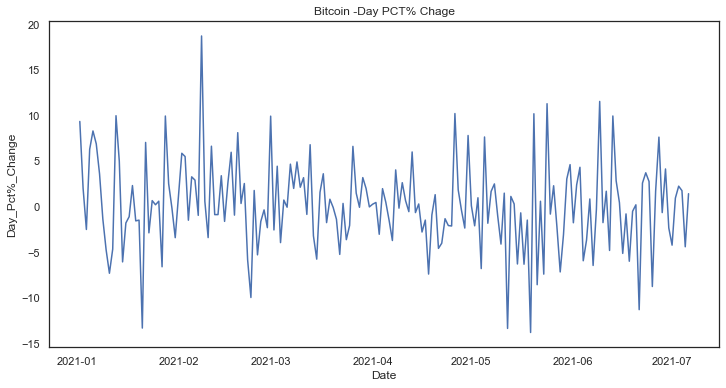

In [134]:
#Representing daily returns in form of a plot for 187 days—


#bitcoin ----day pct change ---


plt.figure(figsize = (12, 6))

sns.lineplot(x=bitcoin_df["Date"],y=bitcoin_df["Day_Pct%_Change"])

plt.title("Bitcoin -Day PCT% Chage")
plt.show()

#inferences ----->>



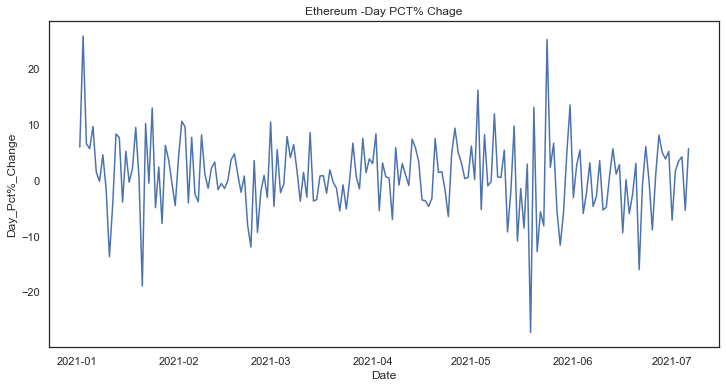

In [135]:

# ethereum ----day pct change ---

plt.figure(figsize = (12, 6))

sns.lineplot(x=ethereum_df["Date"],y=ethereum_df["Day_Pct%_Change"])

plt.title("Ethereum -Day PCT% Chage")
plt.show()


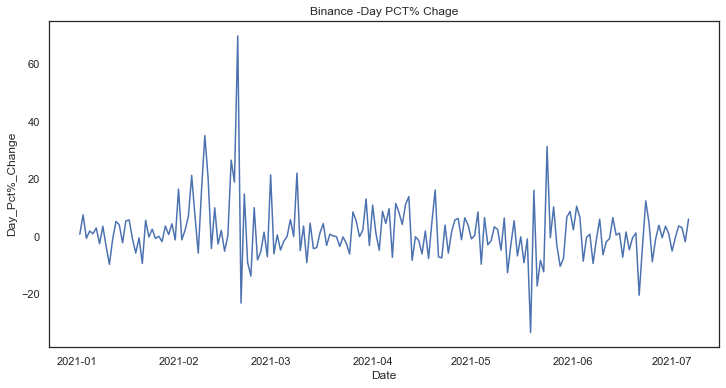

In [136]:

# binance ----day pct change ---


plt.figure(figsize = (12, 6))

sns.lineplot(x=binance_df["Date"],y=binance_df["Day_Pct%_Change"])

plt.title("Binance -Day PCT% Chage")
plt.show()
crypto_names=["Bitcoin","Ethereum","Binance","Dogecoin","Cardano","Polkadot","Solana","Tether","XRP","USDCoin"]

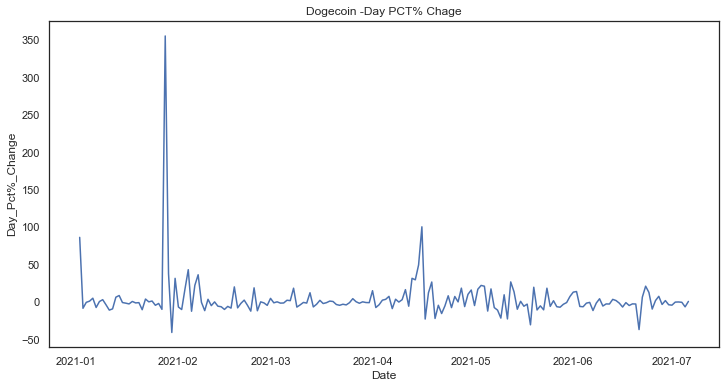

In [137]:
#dogecoin -day pct% change 

plt.figure(figsize = (12, 6))

sns.lineplot(x=dogecoin_df["Date"],y=dogecoin_df["Day_Pct%_Change"])

plt.title("Dogecoin -Day PCT% Chage")
plt.show()

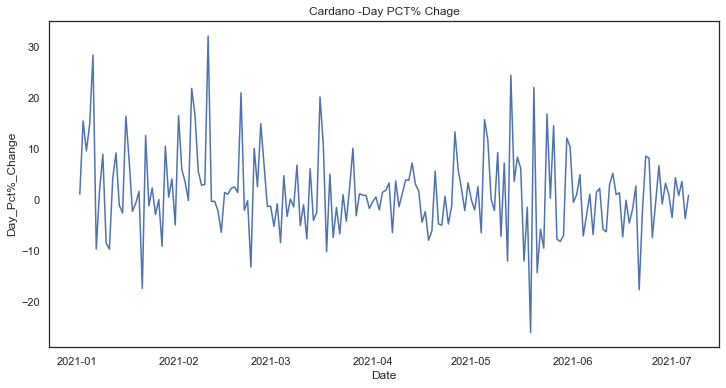

In [138]:
#cardano -- day % change 

plt.figure(figsize = (12, 6))

sns.lineplot(x=cardano_df["Date"],y=cardano_df["Day_Pct%_Change"])

plt.title("Cardano -Day PCT% Chage")
plt.show()

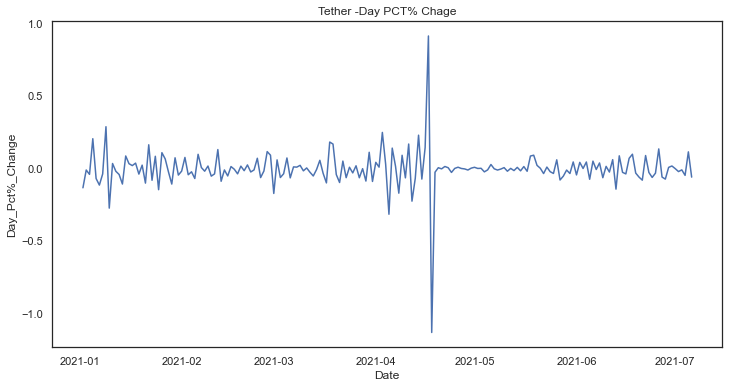

In [139]:
#tether -pct_change  satble coins 

plt.figure(figsize = (12, 6))

sns.lineplot(x=tether_df["Date"],y=tether_df["Day_Pct%_Change"])

plt.title("Tether -Day PCT% Chage")
plt.show()

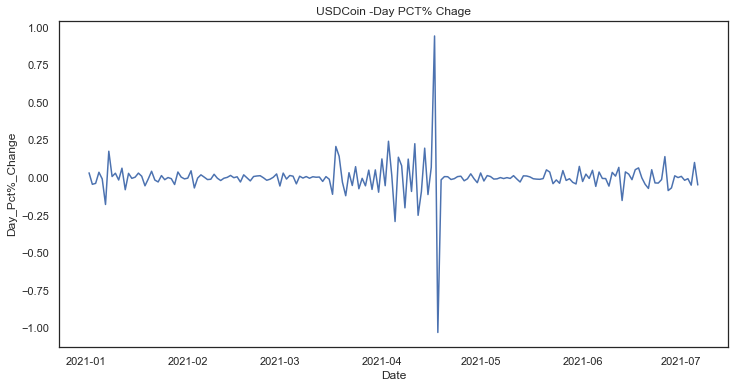

In [140]:
# USD coin #stable coins

plt.figure(figsize = (12, 6))

sns.lineplot(x=usd_df["Date"],y=usd_df["Day_Pct%_Change"])

plt.title("USDCoin -Day PCT% Chage")
plt.show()

In [141]:
#inferences combining all or major cryptos daily % change observed 





# Plotting daily returns distribution histogram —

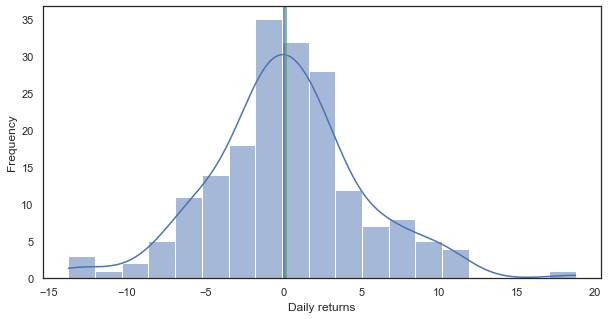

count    186.000000
mean       0.200248
std        4.877162
min      -13.766122
25%       -2.297836
50%        0.068390
75%        2.604625
max       18.746471
Name: Day_Pct%_Change, dtype: float64

In [142]:
#Plotting daily returns distribution histogram —

plt.figure(figsize=(10,5))
sns.histplot(bitcoin_df["Day_Pct%_Change"],kde=True)
plt.xlabel("Daily returns")
plt.ylabel("Frequency")
plt.axvline(bitcoin_df["Day_Pct%_Change"].mean(),color="g")
plt.axvline(bitcoin_df["Day_Pct%_Change"].median(),color="b")
plt.show()

#satistics
bitcoin_df["Day_Pct%_Change"].describe()


#1.The daily returns histogram is centered about origin. 
#2.for the past 6 months, the mean daily returns has been about 0.200248
#3.for most of the days we have daily returns less than 2%
#4.max percentage change value is 18% and min percentage change value is -13% in past 6 months bitcoin data
#5.


# Trend Analysis

In [143]:
# 5. Trend Analysis
# Next we add a new column ‘Trend’ whose values are based on the day-to-day percentage 
# change we calculated above. 
# Trend is determined from below relationship —

def get_trend(x):
    
    if x > -0.5 and x <= 0.5:
        return "Slight or No change"
    elif x > 0.5 and x <= 1:
        return "Slight Positive"
    elif x > -1 and x <= -0.5:
        return "Slight Negative"
    elif x > 1 and x <= 3:
        return "Positive"
    elif x > -3 and x <= -1:
        return "Negative"
    elif x > 3 and x <= 7:
        return "Among top gainers"
    elif x > -7 and x <= -3:
        return "Among top losers"
    elif x > 7:
        return "Bull run"
    elif x <= -7:
        return "Bear drop"

bitcoin_df["Trend"]= bitcoin_df["Day_Pct%_Change"].apply(lambda x:get_trend(x))
bitcoin_df.head()



,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Day_Pct%_Change,Trend
1,Bitcoin,BTC,2021-01-02,33155.11882,29091.18119,29376.45583,32127.26794,6.786542e+10,5.970000e+11,9.372581,Bull run
2,Bitcoin,BTC,2021-01-03,34608.55674,32052.31708,32129.40736,32782.02447,7.866524e+10,6.090000e+11,2.038009,Positive
3,Bitcoin,BTC,2021-01-04,33440.21857,28722.75527,32810.94764,31971.91352,8.116348e+10,5.940000e+11,-2.471205,Negative
4,Bitcoin,BTC,2021-01-05,34437.59059,30221.18674,31977.04113,33992.42934,6.754732e+10,6.320000e+11,6.319659,Among top gainers
5,Bitcoin,BTC,2021-01-06,36879.69857,33514.03374,34013.61453,36824.36441,7.528943e+10,6.850000e+11,8.331076,Bull run


# We wish to see how the bitcoin  was trending in past 6months from 1st jan 2021 to 6th july 2021. 
This can be visualized as a pie chart, with each sector representing the percentage of days each trend occurred. 
We’ll plot a pie chart for the ‘Trend’ column to visualize the relative frequency of each trend category.
For this, we’ll use the groupby() function with the trend column to aggregate all days with the same trend into a single group before plotting the pie chart.
Visualizing Trend Frequency with Pie-Chart —

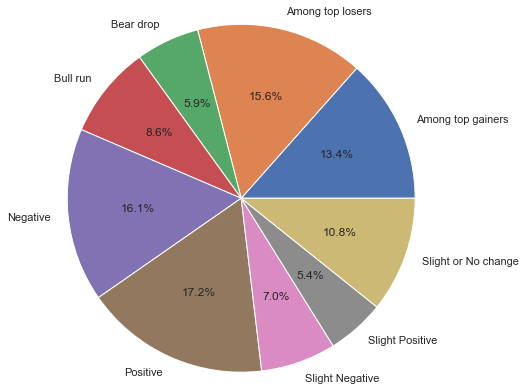

In [144]:
pie_data_bitcoin = bitcoin_df.groupby('Trend')
pie_label = sorted([i for i in bitcoin_df.loc[:, 'Trend'].unique()])
plt.pie(pie_data_bitcoin['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

#inferences about bitcoin 

#1.
#2.


# 6. Daily Returns and Volume

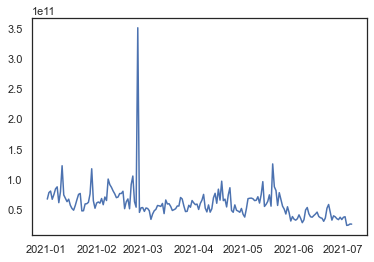

In [171]:
# plt.stem(bitcoin_df["Date"], bitcoin_df["Day_Pct%_Change"])

plt.plot(bitcoin_df["Date"],bitcoin_df["Volume"])


In [211]:
crypto_df=pd.concat(list_df)
crypto_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Bitcoin,BTC,01-01-2021,29600.626950,28803.585010,28994.008920,29374.151890,4.073030e+10,5.460000e+11
1,Bitcoin,BTC,02-01-2021,33155.118820,29091.181190,29376.455830,32127.267940,6.786542e+10,5.970000e+11
2,Bitcoin,BTC,03-01-2021,34608.556740,32052.317080,32129.407360,32782.024470,7.866524e+10,6.090000e+11
3,Bitcoin,BTC,04-01-2021,33440.218570,28722.755270,32810.947640,31971.913520,8.116348e+10,5.940000e+11
4,Bitcoin,BTC,05-01-2021,34437.590590,30221.186740,31977.041130,33992.429340,6.754732e+10,6.320000e+11
...,...,...,...,...,...,...,...,...,...
182,USD Coin,USDC,02-07-2021,1.000916,0.999966,1.000177,1.000035,1.787896e+09,2.539775e+10
183,USD Coin,USDC,03-07-2021,1.000670,0.999925,1.000048,0.999984,1.491017e+09,2.550437e+10
184,USD Coin,USDC,04-07-2021,1.000187,0.998901,0.999956,0.999500,1.578667e+09,2.551172e+10
185,USD Coin,USDC,05-07-2021,1.000839,0.999459,0.999565,1.000528,1.887496e+09,2.554724e+10


In [212]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 0 to 186
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       1870 non-null   object 
 1   Symbol     1870 non-null   object 
 2   Date       1870 non-null   object 
 3   High       1870 non-null   float64
 4   Low        1870 non-null   float64
 5   Open       1870 non-null   float64
 6   Close      1870 non-null   float64
 7   Volume     1870 non-null   float64
 8   Marketcap  1870 non-null   float64
dtypes: float64(6), object(3)
memory usage: 124.2+ KB


In [213]:
crypto_df.isnull().sum()

Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [214]:
crypto_df.describe()

,High,Low,Open,Close,Volume,Marketcap
count,1870.000000,1870.000000,1870.000000,1870.000000,1.870000e+03,1.870000e+03
mean,4956.252093,4598.007510,4793.415376,4796.938234,2.358528e+10,1.317624e+11
std,14399.324363,13433.688238,13961.136444,13965.541524,3.876495e+10,2.566356e+11
min,0.005685,0.004615,0.004681,0.005685,2.572255e+07,8.379213e+07
25%,1.000545,0.999388,0.999983,1.000017,1.922830e+09,1.146222e+10
50%,2.255447,1.891964,2.006604,2.018511,4.374596e+09,3.501068e+10
75%,307.660667,270.075848,289.979110,290.372962,3.143834e+10,6.253357e+10
max,64863.098910,62208.964370,63523.754870,63503.457930,3.510000e+11,1.190000e+12


In [215]:
crypto_df.dtypes

Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [216]:
crypto_df["Date"]=pd.to_datetime(crypto_df["Date"],format="%d-%m-%Y")
crypto_df.dtypes

Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [217]:
crypto_df=crypto_df.sort_values(by=["Date"])
crypto_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Bitcoin,BTC,2021-01-01,29600.626950,28803.585010,28994.008920,29374.151890,4.073030e+10,5.460000e+11
0,XRP,XRP,2021-01-01,0.249270,0.217288,0.219845,0.237444,5.888429e+09,1.078093e+10
0,Binance Coin,BNB,2021-01-01,38.928177,37.046306,37.374572,37.905011,4.591657e+08,5.473732e+09
0,Tether,USDT,2021-01-01,1.002052,1.000608,1.000614,1.001916,6.050999e+10,2.111601e+10
0,Ethereum,ETH,2021-01-01,749.201859,719.792258,737.708378,730.367569,1.365200e+10,8.331854e+10
...,...,...,...,...,...,...,...,...,...
186,Binance Coin,BNB,2021-07-06,321.520965,302.195584,302.195584,320.934802,2.203265e+09,4.924196e+10
186,Ethereum,ETH,2021-07-06,2346.294874,2197.919385,2197.919385,2324.679449,2.089186e+10,2.710290e+11
186,Bitcoin,BTC,2021-07-06,35038.536360,33599.916170,33723.509660,34235.193450,2.650126e+10,6.420000e+11
186,XRP,XRP,2021-07-06,0.679923,0.652676,0.653055,0.665402,1.938959e+09,3.072284e+10


In [264]:
crypto_df.groupby(["Date","Name"])["Volume"].sum()

Date        Name        
2021-01-01  Binance Coin    4.591657e+08
            Bitcoin         4.073030e+10
            Cardano         1.122218e+09
            Dogecoin        2.289615e+08
            Ethereum        1.365200e+10
                                ...     
2021-07-06  Polkadot        1.001573e+09
            Solana          3.653360e+08
            Tether          5.105419e+10
            USD Coin        2.312602e+09
            XRP             1.938959e+09
Name: Volume, Length: 1870, dtype: float64

c:\users\mayur g\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Volume'>

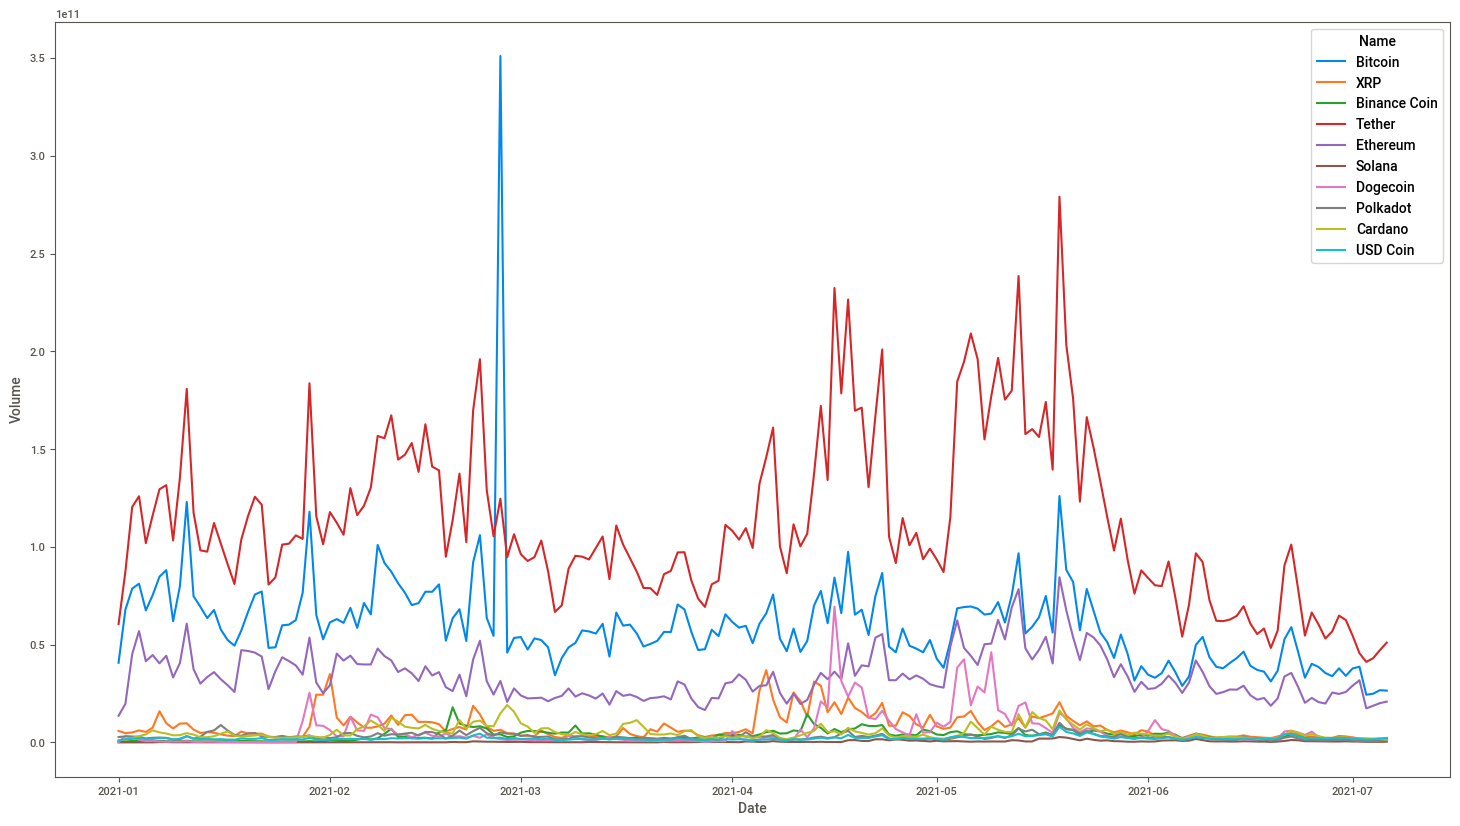

In [255]:
plt.figure(figsize=(18,10))
sns.lineplot("Date","Volume",hue="Name",data=crypto_df)

In [218]:
cross_tab_crypto=pd.crosstab(index=crypto_df["Date"],columns=crypto_df["Name"],values=crypto_df["Close"],aggfunc=sum)
cross_tab_crypto=cross_tab_crypto.reset_index()
cross_tab_crypto.columns=['Date', 'Binance Coin', 'Bitcoin', 'Cardano', 'Dogecoin', 'Ethereum',
       'Polkadot', 'Solana', 'Tether', 'USD Coin', 'XRP']
cross_tab_crypto

,Date,Binance Coin,Bitcoin,Cardano,Dogecoin,Ethereum,Polkadot,Solana,Tether,USD Coin,XRP
0,2021-01-01,37.905011,29374.15189,0.175350,0.005685,730.367569,8.306819,1.842084,1.001916,0.999823,0.237444
1,2021-01-02,38.241593,32127.26794,0.177423,0.010615,774.534968,9.208837,1.799275,1.000600,1.000162,0.221655
2,2021-01-03,41.148980,32782.02447,0.204995,0.009771,975.507673,10.033283,2.161752,1.000514,0.999736,0.225848
3,2021-01-04,40.926355,31971.91352,0.224762,0.009767,1040.233048,9.469611,2.485097,1.000128,0.999372,0.236677
4,2021-01-05,41.734600,33992.42934,0.258314,0.009920,1100.006099,9.701656,2.157217,1.002202,0.999749,0.226750
...,...,...,...,...,...,...,...,...,...,...,...
182,2021-07-02,287.423094,33897.04859,1.394397,0.245264,2150.040364,15.340774,34.020482,1.000033,1.000035,0.656763
183,2021-07-03,298.237117,34668.54840,1.406836,0.246411,2226.114282,15.553716,34.478816,0.999956,0.999984,0.672888
184,2021-07-04,307.732096,35287.77977,1.458184,0.246483,2321.724112,16.014026,34.310601,0.999501,0.999500,0.694945
185,2021-07-05,302.377980,33746.00246,1.404898,0.231614,2198.582464,15.235582,32.984588,1.000667,1.000528,0.654300


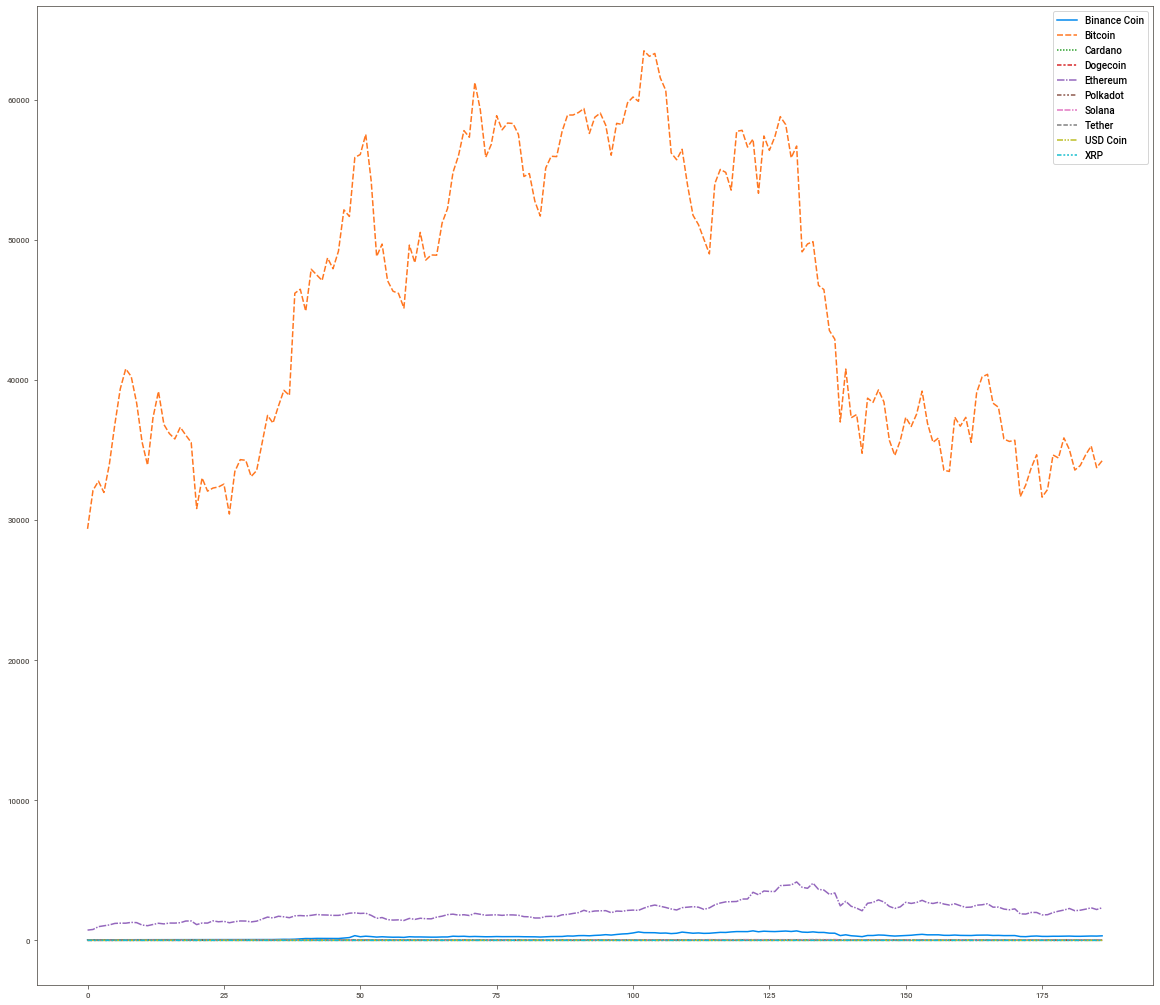

In [241]:
plt.figure(figsize=(20,18))
sns.lineplot(data=cross_tab_crypto)
plt.legend(loc="upper right")

In [242]:
# list_coin=["Bitcoin","Ethereum","Cardano","Binance Coin","Tether","XRP","Dogecoin","USD Coin","Polkadot","Solana"]
# my_colors = plt.rcParams['axes.prop_cycle']() # <<< note that we CALL the prop_cycle

# for i,j in enumerate(list_coin):
#     sns.lineplot(cross_tab_crypto["Date"], cross_tab_crypto[j])


In [152]:
# my_report = sweetviz.analyze(crypto_df,target_feat='Close')


In [244]:
### create a whole report in form of HTML file
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:>

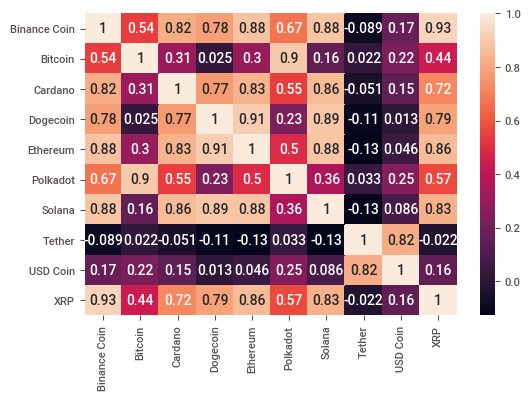

In [245]:
sns.heatmap(cross_tab_crypto.drop(["Date"],axis=1).corr(),annot=True)

In [9]:
# import nest_asyncio
# nest_asyncio.apply()



In [8]:
# import twint
# c = twint.Config()
# c.Lang = "en"
# c.Search = '#bitcoin'
# c.Limit = 4000
# c.Since = '2020-10-12'
# c.until= '2021-01-20'
# c.Pandas=True
# # Run
# twint.run.Search(c)

In [72]:
import os

# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results 1000 --since 2021-01-01 twitter-search 'bitcoin until:2021-07-07' > text-query-tweetsbitcoin.json")

2

In [11]:
!pip install snscrape

You should consider upgrading via the 'c:\users\mayur g\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [159]:
import snscrape.modules.twitter as sntwitter
import pandas

# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('bitcoin since:2020-12-31 until:2021-01-02').get_items()):
    if i>100:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [160]:
tweets_df2.dtypes
tweet

Tweet(url='https://twitter.com/saltlakecitybae/status/1345156781278785536', date=datetime.datetime(2021, 1, 1, 23, 55, 43, tzinfo=datetime.timezone.utc), content="bitcoin hit $29,500 and I'm holding my breath", id=1345156781278785536, username='saltlakecitybae', outlinks=[], outlinksss='', tcooutlinks=[], tcooutlinksss='')

In [108]:
# a=tweets_df2

In [109]:
tweets_df2

,Datetime,Tweet Id,Text,Username
0,2021-01-01 23:59:59+00:00,1345157857575129090,@bitcoin_qr #BTC,jaydoamongus
1,2021-01-01 23:59:58+00:00,1345157850440544258,Crypto adoption in 2021: Top trends and predictions on what may come\nhttps://t.co/4sYraOoslq\n#...,WoodooProd
2,2021-01-01 23:59:56+00:00,1345157843721269250,THINGS THAT MAKE YOU GO HMMMMM\n#SEC Will Inaugurate A Node On #XRP Ledger Said Ripple’s EX http...,opalessense
3,2021-01-01 23:59:55+00:00,1345157840374280195,https://t.co/rkNf5SOxG4\nTE REGISTRAS Y TE DAN 0.001 BITCOIN....LO RETIRAS CUANDO TENGAS 0.002.....,juandiaz50
4,2021-01-01 23:59:53+00:00,1345157833138978816,"Ripple Executive Says US Laws on Crypto Are Vague, Future Project Could Be Better Than Bitcoin, ...",YSojourners
...,...,...,...,...
96,2021-01-01 23:55:58+00:00,1345156844180815873,仮想通貨リッ� https://t.co/kwTlz5hjGr #btc #ビットコイン #bitcoin #仮想通貨 #cryptocurrency #jpy #暗号通貨 #ニュース,btcjpyMarket
97,2021-01-01 23:55:50+00:00,1345156810995625985,@DonaldJTrumpJr What is worst president in US history and his hypocritical son for a bazillion d...,melliemmck
98,2021-01-01 23:55:50+00:00,1345156810924318720,#Bitcoin https://t.co/jqpAHrOZXG,Simoka1c
99,2021-01-01 23:55:49+00:00,1345156808684560385,"@paxtrader777 2/5/2018 XIV\n2/6/2018 EVIX\n2/6/2018 Bitcoin\nI was long all 3, blew out of every...",jmysct0


In [110]:
import datetime
tweets_df2["Date_Time"]=tweets_df2["Datetime"].apply(lambda x: ((x+datetime.timedelta(hours=5,minutes=30)).date()) if isinstance(x,datetime.datetime) else "")

In [111]:
tweets_df2["Date_Time"]

0      2021-01-02
1      2021-01-02
2      2021-01-02
3      2021-01-02
4      2021-01-02
          ...    
96     2021-01-02
97     2021-01-02
98     2021-01-02
99     2021-01-02
100    2021-01-02
Name: Date_Time, Length: 101, dtype: object

In [102]:
tweets_df2["Datetime"].tail(5)

96    2021-01-01 23:55:58+00:00
97    2021-01-01 23:55:50+00:00
98    2021-01-01 23:55:50+00:00
99    2021-01-01 23:55:49+00:00
100   2021-01-01 23:55:48+00:00
Name: Datetime, dtype: datetime64[ns, UTC]

In [125]:
import pandas as pd
  
date_lst=[]
per1 = pd.date_range(start ='1-1-2021', 
         end ='7-8-2021')
  
for val in per1:
    print((val.date()))
    date_lst.append(val.date())

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-01-14
2021-01-15
2021-01-16
2021-01-17
2021-01-18
2021-01-19
2021-01-20
2021-01-21
2021-01-22
2021-01-23
2021-01-24
2021-01-25
2021-01-26
2021-01-27
2021-01-28
2021-01-29
2021-01-30
2021-01-31
2021-02-01
2021-02-02
2021-02-03
2021-02-04
2021-02-05
2021-02-06
2021-02-07
2021-02-08
2021-02-09
2021-02-10
2021-02-11
2021-02-12
2021-02-13
2021-02-14
2021-02-15
2021-02-16
2021-02-17
2021-02-18
2021-02-19
2021-02-20
2021-02-21
2021-02-22
2021-02-23
2021-02-24
2021-02-25
2021-02-26
2021-02-27
2021-02-28
2021-03-01
2021-03-02
2021-03-03
2021-03-04
2021-03-05
2021-03-06
2021-03-07
2021-03-08
2021-03-09
2021-03-10
2021-03-11
2021-03-12
2021-03-13
2021-03-14
2021-03-15
2021-03-16
2021-03-17
2021-03-18
2021-03-19
2021-03-20
2021-03-21
2021-03-22
2021-03-23
2021-03-24
2021-03-25
2021-03-26
2021-03-27
2021-03-28
2021-03-29
2021-03-30
2021-03-31
2021-04-01

[datetime.date(2021, 1, 1),
 datetime.date(2021, 1, 2),
 datetime.date(2021, 1, 3),
 datetime.date(2021, 1, 4),
 datetime.date(2021, 1, 5),
 datetime.date(2021, 1, 6),
 datetime.date(2021, 1, 7),
 datetime.date(2021, 1, 8),
 datetime.date(2021, 1, 9),
 datetime.date(2021, 1, 10),
 datetime.date(2021, 1, 11),
 datetime.date(2021, 1, 12),
 datetime.date(2021, 1, 13),
 datetime.date(2021, 1, 14),
 datetime.date(2021, 1, 15),
 datetime.date(2021, 1, 16),
 datetime.date(2021, 1, 17),
 datetime.date(2021, 1, 18),
 datetime.date(2021, 1, 19),
 datetime.date(2021, 1, 20),
 datetime.date(2021, 1, 21),
 datetime.date(2021, 1, 22),
 datetime.date(2021, 1, 23),
 datetime.date(2021, 1, 24),
 datetime.date(2021, 1, 25),
 datetime.date(2021, 1, 26),
 datetime.date(2021, 1, 27),
 datetime.date(2021, 1, 28),
 datetime.date(2021, 1, 29),
 datetime.date(2021, 1, 30),
 datetime.date(2021, 1, 31),
 datetime.date(2021, 2, 1),
 datetime.date(2021, 2, 2),
 datetime.date(2021, 2, 3),
 datetime.date(2021, 2, 4)

In [173]:
import snscrape.modules.twitter as sntwitter
import pandas

# Creating list to append tweet data to
tweets_list2 = []

tweets_df=[]
# Using TwitterSearchScraper to scrape data and append tweets to list
for i in date_lst:
    print(i)
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'bitcoin since:2020-12-31 until:{i}').get_items()):
        if i>500:
            break
        tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])

    # Creating a dataframe from the tweets list above
    tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
    tweets_df2["Date_Time"]=tweets_df2["Datetime"].apply(lambda x: ((x+datetime.timedelta(hours=5,minutes=30)).date()) if isinstance(x,datetime.datetime) else "")
    tweets_df.append(tweets_df2)

2021-01-01


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=bitcoin+since%3A2020-12-31+until%3A2021-01-01&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaGwLfhxcLVqSUWgsC3zdCW1qklEnEV7O95FYCJehgETkVXUzUBFQ4VAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=10)")), retrying
Error retrieving https://api.twitt

2021-01-02


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=bitcoin+since%3A2020-12-31+until%3A2021-01-02&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaGwLn5urb6qiUWhMC6ubn8-qolEnEVmPd5FYCJehgETkVXUzUBFQoVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=10)")), retrying
Error retrieving https://api.twitt

2021-01-03


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=bitcoin+since%3A2020-12-31+until%3A2021-01-03&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaIgLeF-PuerCUWhsC39ZLin6wlEnEVgNJ5FYCJehgETkVXUzUBFSQVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=10)")), retrying
Error retrieving https://api.twitt

2021-01-04
2021-01-05


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=bitcoin+since%3A2020-12-31+until%3A2021-01-05&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaWwLiZu6boriUWgsC6mcOt6a4lEnEVzMZ5FYCJehgETkVXUzUBFSoVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=10)")), retrying


2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=bitcoin+since%3A2020-12-31+until%3A2021-01-11&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaAwKyBjpLFtiUWksC5seWPxrYlEnEVkNV5FYCJehgETkVXUzUBFSIVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=10)")), retrying
Error retrieving https://api.twitt

2021-01-12
2021-01-13


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=bitcoin+since%3A2020-12-31+until%3A2021-01-13&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaEwLr9iP2OuSUWgIC74d3bj7klEnEVyOJ5FYCJehgETkVXUzUBFRgVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=10)")), retrying
Error retrieving https://api.twitt

2021-01-14
2021-01-15
2021-01-16
2021-01-17
2021-01-18
2021-01-19
2021-01-20
2021-01-21
2021-01-22
2021-01-23
2021-01-24
2021-01-25
2021-01-26
2021-01-27
2021-01-28
2021-01-29
2021-01-30
2021-01-31
2021-02-01
2021-02-02
2021-02-03
2021-02-04
2021-02-05
2021-02-06
2021-02-07
2021-02-08
2021-02-09
2021-02-10
2021-02-11
2021-02-12
2021-02-13
2021-02-14
2021-02-15
2021-02-16
2021-02-17
2021-02-18
2021-02-19
2021-02-20
2021-02-21
2021-02-22
2021-02-23
2021-02-24
2021-02-25


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=bitcoin+since%3A2020-12-31+until%3A2021-02-25&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaCwKOp0OO88CUWhoCyxeLyvfAlEnEVrMB5FYCJehgEVVNFUjUBFS4VAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=10)")), retrying


2021-02-26
2021-02-27
2021-02-28
2021-03-01
2021-03-02
2021-03-03
2021-03-04
2021-03-05
2021-03-06
2021-03-07
2021-03-08
2021-03-09
2021-03-10
2021-03-11
2021-03-12
2021-03-13
2021-03-14
2021-03-15
2021-03-16
2021-03-17
2021-03-18
2021-03-19
2021-03-20
2021-03-21
2021-03-22
2021-03-23
2021-03-24
2021-03-25
2021-03-26
2021-03-27
2021-03-28
2021-03-29
2021-03-30
2021-03-31
2021-04-01
2021-04-02
2021-04-03
2021-04-04
2021-04-05
2021-04-06
2021-04-07
2021-04-08
2021-04-09
2021-04-10
2021-04-11
2021-04-12
2021-04-13
2021-04-14
2021-04-15
2021-04-16
2021-04-17
2021-04-18
2021-04-19
2021-04-20
2021-04-21
2021-04-22
2021-04-23
2021-04-24
2021-04-25
2021-04-26
2021-04-27
2021-04-28
2021-04-29
2021-04-30
2021-05-01
2021-05-02
2021-05-03
2021-05-04
2021-05-05
2021-05-06
2021-05-07
2021-05-08
2021-05-09
2021-05-10
2021-05-11
2021-05-12
2021-05-13
2021-05-14
2021-05-15
2021-05-16
2021-05-17
2021-05-18
2021-05-19
2021-05-20
2021-05-21
2021-05-22
2021-05-23
2021-05-24
2021-05-25
2021-05-26
2021-05-27

In [174]:
tweets_df[-1]

,Datetime,Tweet Id,Text,Username,Date_Time
0,2020-12-31 23:59:59+00:00,1344795468522516481,Happy new year cryptofam 🎊🎊🚀🎉🎉\nWishing you all the very best for 2021.\n\n#bitcoin $BTC #ethere...,CypherGh0st,2021-01-01
1,2020-12-31 23:59:57+00:00,1344795459857096709,@cryptoworld202 It's to have Bitcoin because I don't have it.\nPlease send some to me.\nThanks.\...,job_focus,2021-01-01
2,2020-12-31 23:59:57+00:00,1344795459215368193,Un concessionnaire de voitures de luxe devient un terrain de jeu pour les investisseurs Bitcoin ...,LaCryptoMonnai1,2021-01-01
3,2020-12-31 23:59:55+00:00,1344795453402075136,My only hope for 2021 is that more people realize that #bitcoin can solve the wealth inequality ...,TheIRAFinancial,2021-01-01
4,2020-12-31 23:59:55+00:00,1344795450000486401,#Investing 1017.4% in this optimal #crypto portfolio and -917.4% #cash in the past 24 hours woul...,CryptoWatchBot,2021-01-01
...,...,...,...,...,...
94684,2021-07-07 23:43:28+00:00,1412920232746835969,@Bitcoin_K_S_A ❤️,boom873,2021-07-08
94685,2021-07-07 23:43:28+00:00,1412920230607785989,"I love Progressives coming to #bitcoin. Partly 'cos it illustrates how universal freedom is, and...",profstonge,2021-07-08
94686,2021-07-07 23:43:27+00:00,1412920227935911936,#Plastic #finance #ESG #Compliant #plasticfinance #plastic #bitcoin https://t.co/vXAgPy7hqn,Redcar003,2021-07-08
94687,2021-07-07 23:43:27+00:00,1412920227080249348,@DimitarDinev7 @michael_saylor #bitcoin super effective,passytee,2021-07-08


In [175]:
pf=tweets_df[-1]
pf.drop(["Datetime"],axis=1,inplace=True)

In [176]:
pf.tail(45)

,Tweet Id,Text,Username,Date_Time
94644,1412920570006605826,@Joyceli5901 Yes your look is awesome in every way have the best week good luck in your study an...,jspringett1,2021-07-08
94645,1412920557868175363,"@AirdropStario this project is very good, i like this project, great team, great community, keep...",NftAnto,2021-07-08
94646,1412920555750055936,"🔴 Bitcoin caiu :(\n\n🇧🇷 R$ 177.907,00 (-0,57%)\n🇺🇸 US$ 33.998,00\n\n📈 24h: +0,23%\n\n🗓️ Em 07/07...",BTC_Bipolar,2021-07-08
94647,1412920541833572352,"As for technical analysis, Groundhog day—Bitcoin has continued to track sideways, with support a...",eqonex,2021-07-08
94648,1412920537387606019,"Which leaves us with the conclusion that, although volumes are lower, inflows have all but stopp...",eqonex,2021-07-08
94649,1412920534719926278,What may surprise you is the growing number of users flocking to #Bitcoin. We hit a new record h...,eqonex,2021-07-08
94650,1412920528516620290,"@BTC_Archive @maxkeiser Technically speaking, Tudor didn't increase his allocation, bitcoin did ...",LindenJohan,2021-07-08
94651,1412920523894366211,"this project is very good, i like this project, great team, great community, keep up the good wo...",NftAnto,2021-07-08
94652,1412920521339981824,"Les dejo la comparación entre las direcciónes activas de #BTC y $ETH, donde se puede ver clarame...",CriptoSpanglish,2021-07-08
94653,1412920514859896839,"#DailyBTCAnalysis\n#Bitcoin remains in a tight range, with prices mildly firmer today as the bul...",eqonex,2021-07-08


In [178]:
pf.to_excel("tweets_data2021_1000.xlsx",index=False)